In [87]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import os
from pathlib import Path


In [92]:
root_folder = Path.cwd().parent
#geo_folder = Path(root_folder).joinpath('data',  'external',  'RegionsShapefiles')


In [2]:
os.chdir('..')

fp = 'data/senegal_weather_spei_1970_2020_025x025_v3.csv'

spei_gdf = gpd.read_file(fp)
spei_gdf.crs = 'epsg:4326'
spei_gdf.head(3)

C:\Anaconda3\envs\omdena-GPSDD\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,field_1,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon,geometry
0,0,1970,1,16.69207191,-16.04318619,0.0,23.19441176470588,0.3338235294117647,22.962058823529414,231.44117647058823,...,26.505000000000003,29.255000000000006,6,0.06182352475339109,,,,,,None
1,1,1970,2,16.69207191,-16.04318619,0.0,25.701785714285723,0.325,25.835714285714285,239.71428571428572,...,26.521071428571425,28.273928571428574,6,-0.595051292597307,,,,,,None
2,2,1970,3,16.69207191,-16.04318619,0.0,25.656451612903222,0.4016129032258065,27.049354838709675,288.4193548387097,...,28.197419354838704,28.14064516129032,6,0.0806600883824905,-0.2247730236262909,,,,,None


In [3]:
spei_gdf.geometry = gpd.points_from_xy(spei_gdf.gpslon,spei_gdf.gpslat)
spei_gdf.head(3)

,field_1,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon,geometry
0,0,1970,1,16.69207191,-16.04318619,0.0,23.19441176470588,0.3338235294117647,22.962058823529414,231.44117647058823,...,26.505000000000003,29.255000000000006,6,0.06182352475339109,,,,,,POINT (-16.04319 16.69207)
1,1,1970,2,16.69207191,-16.04318619,0.0,25.701785714285723,0.325,25.835714285714285,239.71428571428572,...,26.521071428571425,28.273928571428574,6,-0.595051292597307,,,,,,POINT (-16.04319 16.69207)
2,2,1970,3,16.69207191,-16.04318619,0.0,25.656451612903222,0.4016129032258065,27.049354838709675,288.4193548387097,...,28.197419354838704,28.14064516129032,6,0.0806600883824905,-0.2247730236262909,,,,,POINT (-16.04319 16.69207)


In [4]:
spei_gdf['year'] = spei_gdf['year'].astype(int)
spei_gdf['month'] = spei_gdf['month'].astype(int)
spei_gdf['spei_1mon'] = pd.to_numeric(spei_gdf['spei_1mon'],errors='coerce')
spei_gdf['spei_3mon'] = pd.to_numeric(spei_gdf['spei_3mon'],errors='coerce')
spei_gdf['spei_6mon'] = pd.to_numeric(spei_gdf['spei_6mon'],errors='coerce')
spei_gdf['spei_12mon'] = pd.to_numeric(spei_gdf['spei_12mon'],errors='coerce')
spei_gdf.dtypes

field_1                             object
year                                 int32
month                                int32
gpslat                              object
gpslon                              object
total_precipitation                 object
temperature                         object
relative_humidity                   object
humidex                             object
surface_solar_radiation             object
surface_thermal_radiation           object
surface_direct_solar_radiation      object
soil_temperature_level_1            object
soil_temperature_level_2            object
soil_temperature_level_3            object
soil_temperature_level_4            object
id                                  object
spei_1mon                          float64
spei_3mon                          float64
spei_6mon                          float64
spei_12mon                         float64
spei_24mon                          object
spei_48mon                          object
geometry   

In [26]:
slice_df.tail(3)

,field_1,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon,geometry
198893,199217,2020,6,12.44207191,-12.04318619,3.2300000000000004,29.93933333333333,0.6583333333333333,39.95866666666667,250.63333333333333,...,33.325333333333326,33.513333333333335,447,-0.942899,-1.600302,-1.803947,-1.789968,-1.859956925889902,-2.02241623146579,POINT (-12.04319 12.44207)
199505,199830,2020,6,12.44207191,-11.79318619,4.09,29.566666666666666,0.678,39.723,255.76666666666668,...,32.837,33.28866666666667,448,-0.839870,-1.510538,-1.776465,-1.829799,-1.8834644234011177,-1.9866707179558234,POINT (-11.79319 12.44207)
200117,200443,2020,6,12.44207191,-11.54318619,3.420000000000001,29.584000000000003,0.6723333333333336,39.63200000000001,257.03333333333336,...,32.86666666666666,33.41233333333333,449,-0.679535,-1.351702,-1.661002,-1.704364,-1.6331240847664588,-1.756982244863878,POINT (-11.54319 12.44207)


In [18]:
import shapely.geometry as shpgeom
def square_around_grid_pt(grid_pt,side=0.25):
    min_x = grid_pt.x - side*0.5
    max_x = grid_pt.x + side*0.5
    min_y = grid_pt.y - side*0.5
    max_y = grid_pt.y + side*0.5
    
    list_pts = [[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y], [min_x, min_y]]
    
    return shpgeom.Polygon(list_pts)

In [71]:
slice_mask = (spei_gdf.year==2020) & (spei_gdf.month==6)
slice_df = spei_gdf[slice_mask]

slice_df_square = slice_df.copy()
slice_df_square.loc[:,'geometry'] = slice_df.iloc[:]['geometry'].apply(square_around_grid_pt)
# slice_df.drop(columns='geometry',inplace=True)
# slice_df.rename(columns={"grid_geom":"geometry"},inplace=True)


In [33]:
slice_df.head(3)

,field_1,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon,geometry,grid_geom
605,605,2020,6,16.69207191,-16.04318619,0.0,28.84166666666666,0.5830000000000001,36.169999999999995,303.73333333333335,...,30.059333333333335,6,-1.020852,-0.643357,-1.494500,-1.089156,0.18354744389649377,0.15865577744762732,POINT (-16.04319 16.69207),"POLYGON ((-16.16819 16.56707, -15.91819 16.567..."
1217,1218,2020,6,16.69207191,-15.79318619,0.0,30.154666666666664,0.5223333333333334,37.02499999999999,304.3,...,31.478000000000005,7,-0.988233,-0.924240,-1.631598,-1.314963,-0.02320442585653762,-0.11044945521600806,POINT (-15.79319 16.69207),"POLYGON ((-15.91819 16.56707, -15.66819 16.567..."
1829,1831,2020,6,16.69207191,-15.54318619,0.01,31.326,0.4793333333333333,37.94333333333332,303.6666666666667,...,32.77133333333333,8,-1.034481,-1.169386,-1.747976,-1.494856,-0.19805513196414928,-0.3380709615220376,POINT (-15.54319 16.69207),"POLYGON ((-15.66819 16.56707, -15.41819 16.567..."


In [16]:
# Plotly plot of SPEI with points
fig = px.scatter_geo(slice_df,
                    lat=slice_df.geometry.y,
                    lon=slice_df.geometry.x,
                    color="spei_12mon")
fig.update_geos(fitbounds="locations",showcountries=True)
fig.show()

<AxesSubplot:>

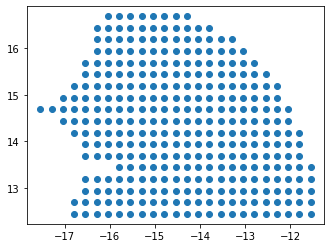

In [43]:
slice_df.geometry.plot()

<AxesSubplot:>

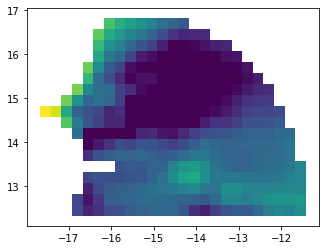

In [72]:
# Choropleth using geopandas.plot

slice_df_square.plot(column='spei_12mon')

In [94]:
with open(Path(root_folder).joinpath("mapbox_token.txt")) as f:
    token = f.read()

In [84]:
# token = ""
fig = px.choropleth_mapbox(slice_df_square,
                   geojson=slice_df_square.geometry,
                   locations=slice_df_square.index,
#                     locationmode='geojson-id',
                   color=slice_df_square.spei_12mon,
#                    scope='africa',
#                   color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.update_geos(fitbounds="locations", visible=False,center={"lat": 14.4097, "lon": -14.8635})#,zoom=7.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  mapbox_accesstoken=token)
fig.show()

In [79]:
# Plotly plot of SPEI with squares around points
fig = px.choropleth(slice_df_square,
                   geojson=slice_df_square.geometry,
                   locations=slice_df_square.index,
#                     locationmode='geojson-id',
                   color=slice_df_square.spei_12mon,
#                    scope='africa',
#                   color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.update_geos(fitbounds="locations", center={"lat": 14.4097, "lon": -14.8635})
fig.show()

In [78]:
import plotly.graph_objects as go

# fig = px.choropleth(slice_df,
#                    geojson=slice_df.grid_geom,
#                    locations=slice_df.id,
# #                     locationmode='geojson-id',
#                    color=slice_df.spei_12mon,
##                    projection="epsg:4326",
# #                    scope='africa',
# #                   color_continuous_scale=px.colors.sequential.Plasma
#                    )

fig = go.Figure(data=go.Choropleth(
    locations=slice_df_square.index, # Spatial coordinates
    z = slice_df_square['spei_12mon'], # Data to be color-coded
#     locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
#     colorbar_title = "Millions USD",
))
fig.update_geos(fitbounds="locations", visible=False, center=dict(lat=14.5,lon=-14.9))

# fig.update_layout(
#     title_text = '2011 US Agriculture Exports by State',
#     geo_scope='usa', # limite map scope to USA
# )

fig.show()